In [1]:
import pandas as pd
import itertools
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

# To enable inline plotting with Jupyter Notebooks
%matplotlib inline

# To show all the rows of a pandas DataFrame
pd.set_option('display.max_rows', None)


In [2]:
df = pd.read_csv('drugsComTrain.tsv', sep='\t')

In [3]:
df.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [4]:
df.condition.value_counts()

condition
Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                               

In [5]:
df_train = df[(df['condition'] == 'Birth Control') |
              (df['condition'] == 'Depression') |
              (df['condition'] == 'High Blood Pressure') |
              (df['condition'] == 'Acne')]


In [6]:
df.shape

(161297, 7)

In [7]:
df_train.shape

(45766, 7)

In [8]:
X = df_train.drop(['Unnamed: 0', 'drugName', 'rating', 'date', 'usefulCount'], axis=1)

In [9]:
X.condition.value_counts()

condition
Birth Control          28788
Depression              9069
Acne                    5588
High Blood Pressure     2321
Name: count, dtype: int64

In [10]:
X.head()

condition                                             review
2   Birth Control  "I used to take another oral contraceptive, wh...
3   Birth Control  "This is my first time using any form of birth...
9   Birth Control  "I had been on the pill for many years. When m...
11     Depression  "I have taken anti-depressants for years, with...
14  Birth Control  "Started Nexplanon 2 months ago because I have...

In [11]:
X_birth = X[X['condition'] == 'Birth Control']
X_dep = X[X['condition'] == 'Depression']
X_bp = X[X['condition'] == 'High Blood Pressure']
X_acne = X[X['condition'] == 'Acne']


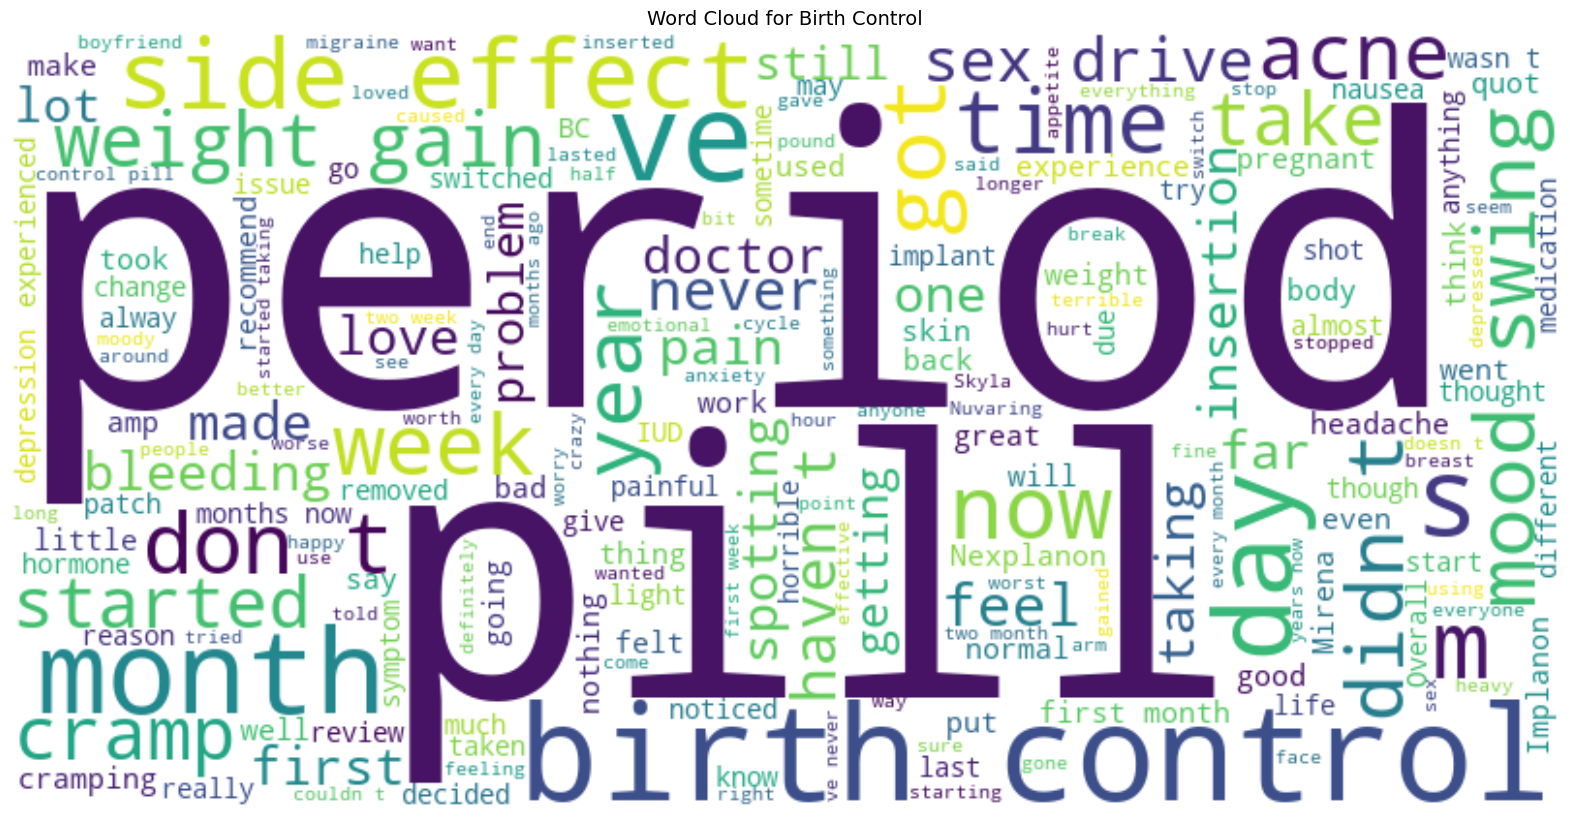

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(X_birth['review']))

# Plot the word cloud
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Birth Control', fontsize=14)
plt.show()


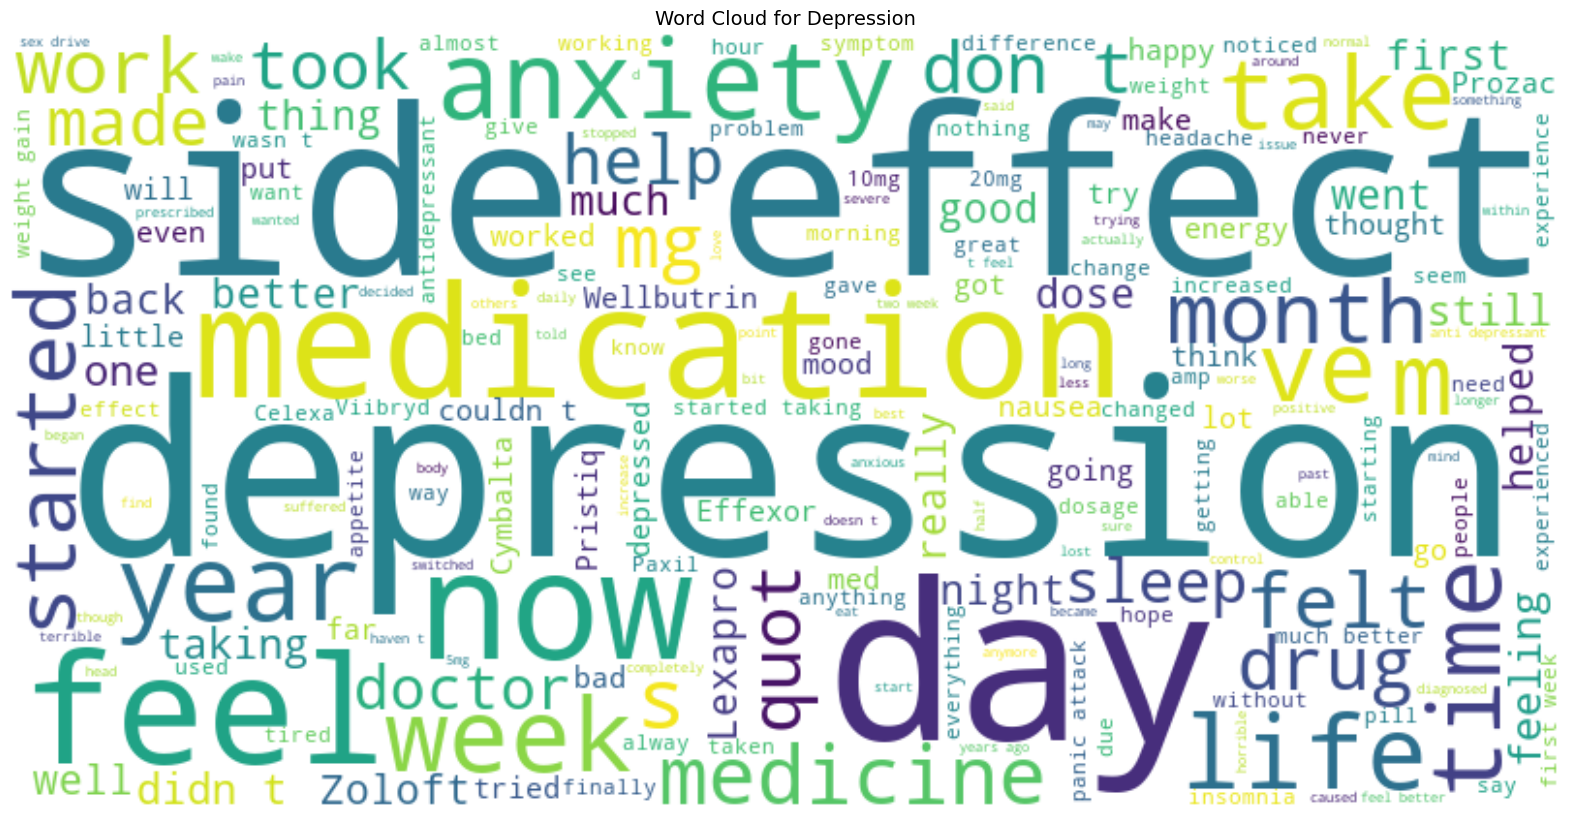

In [13]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(X_dep['review']))

# Plot the word cloud
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Depression', fontsize=14)
plt.show()

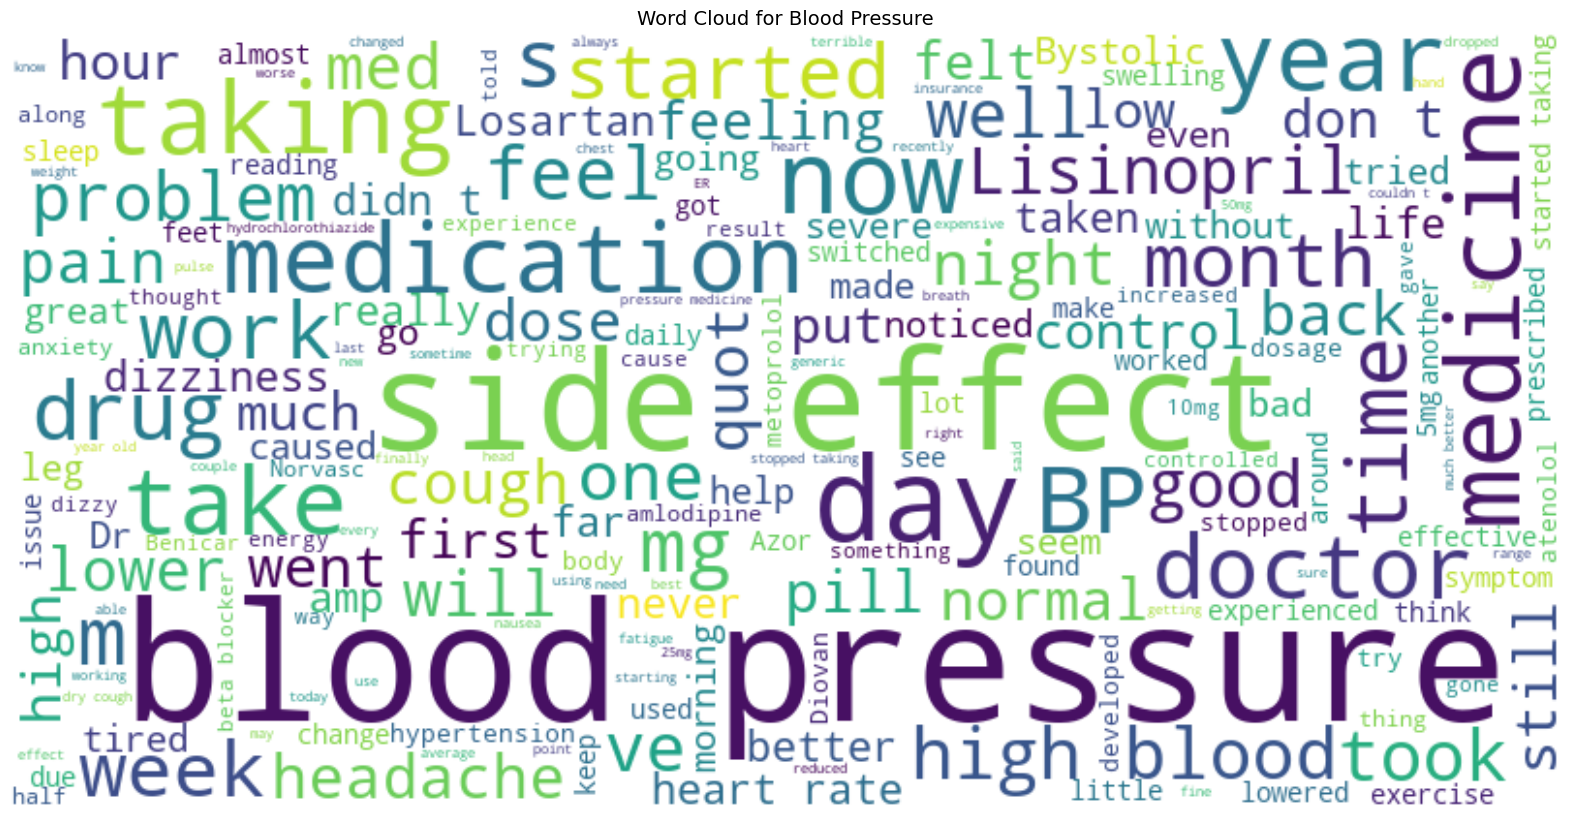

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(X_bp['review']))

# Plot the word cloud
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Blood Pressure', fontsize=14)
plt.show()

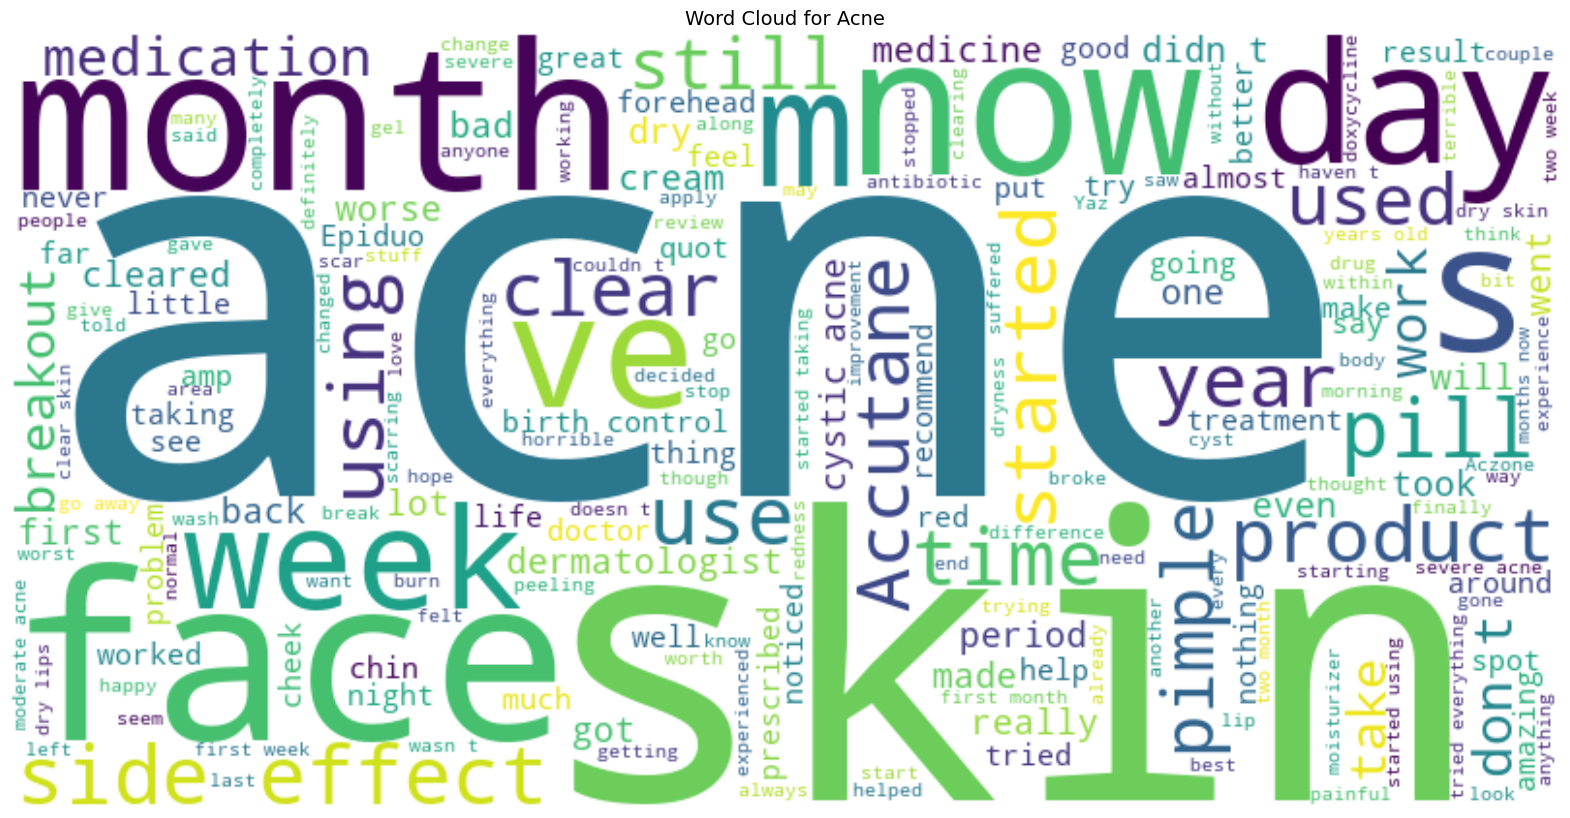

In [15]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(X_acne['review']))

# Plot the word cloud
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Acne', fontsize=14)
plt.show()

In [16]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')


In [17]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already done
nltk.download('stopwords')

# Load English stopwords
stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ubuntulinux/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# Initialize the stemmer and lemmatizer
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()


In [20]:
print (porter.stem("sportingly"))
print(porter.stem ("very"))
print(porter.stem ("troubled"))

sportingli
veri
troubl


In [21]:
# print(lemmatizer.lemmatize("sportingly"))
# print(lemmatizer.lemmatize("very"))
# print(lemmatizer.lemmatize("troubled"))


In [22]:
from bs4 import BeautifulSoup
import re

In [23]:
def review_to_words(raw_review):
    # 1. Remove HTML tags
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()

    # 2. Remove non-letters and make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)

    # 3. Convert to lowercase and split into words
    words = letters_only.lower().split()

    # 4. Remove stopwords
    meaningful_words = [w for w in words if not w in stop]

    # 5. Lemmatization
    lemmatized_words = [lemmatizer.lemmatize(w) for w in meaningful_words]

    # 6. Join words back into a single string
    return ' '.join(lemmatized_words)

In [24]:
import nltk
from nltk.corpus import wordnet

# Download the wordnet data
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Now you can use the lemmatizer as before
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))


[nltk_data] Downloading package wordnet to
[nltk_data]     /home/ubuntulinux/nltk_data...


sportingly
very
troubled


In [25]:
X['review_clean'] = X['review'].apply(review_to_words)


/tmp/ipykernel_32528/2529346676.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [26]:
X.head()

condition                                             review  \
2   Birth Control  I used to take another oral contraceptive, whi...   
3   Birth Control  This is my first time using any form of birth ...   
9   Birth Control  I had been on the pill for many years. When my...   
11     Depression  I have taken anti-depressants for years, with ...   
14  Birth Control  Started Nexplanon 2 months ago because I have ...   

                                         review_clean  
2   used take another oral contraceptive pill cycl...  
3   first time using form birth control glad went ...  
9   pill many year doctor changed rx chateal effec...  
11  taken anti depressant year improvement mostly ...  
14  started nexplanon month ago minimal amount con...

In [27]:
X_feat=X['review_clean']
y=X['condition']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_feat, y, stratify=y, test_size=0.2, random_state=0
)


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.

    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data
count_test = count_vectorizer.transform(X_test)


Accuracy: 95.90%
Confusion matrix, without normalization
[[5639   66   14   39]
 [ 121  984    5    8]
 [  11    5  400   48]
 [  37    4   17 1756]]


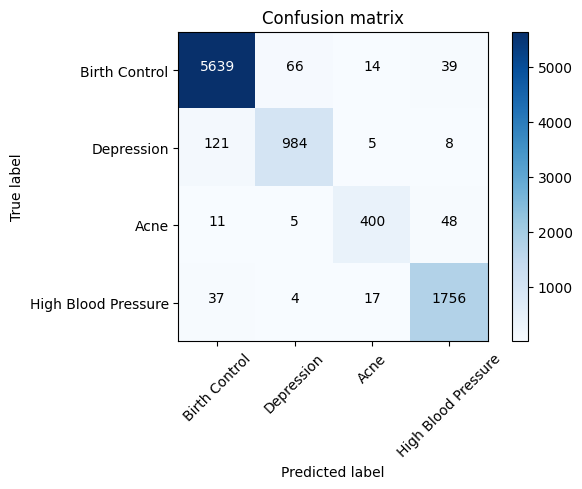

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Initialize the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the model
mnb.fit(count_train, y_train)

# Predict on the test data
pred = mnb.predict(count_test)

# Calculate accuracy
score = metrics.accuracy_score(y_test, pred)
print(f"Accuracy: {score * 100:.2f}%")

# Generate confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Acne', 'High Blood Pressure', 'Depression'])

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Acne', 'High Blood Pressure'])


Accuracy: 97.13%
Confusion matrix, without normalization
[[5683   49    5   21]
 [  62 1039    4   13]
 [  10    6  407   41]
 [  33    3   16 1762]]


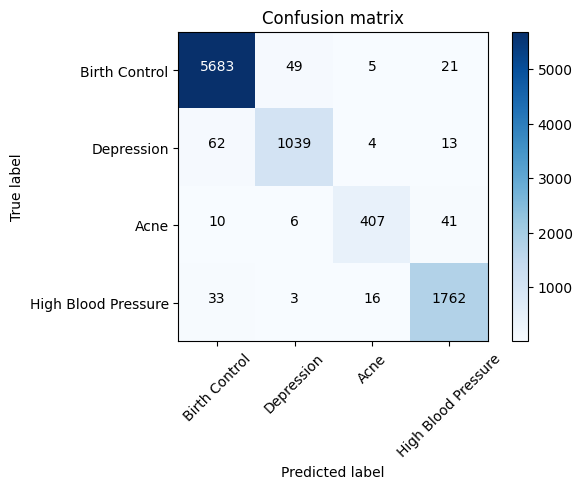

In [32]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

# Initialize the Passive Aggressive Classifier
passive = PassiveAggressiveClassifier()

# Train the model
passive.fit(count_train, y_train)

# Predict on the test data
pred = passive.predict(count_test)

# Calculate accuracy
score = metrics.accuracy_score(y_test, pred)
print(f"Accuracy: {score * 100:.2f}%")

# Generate confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Acne', 'High Blood Pressure', 'Depression'])

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Acne', 'High Blood Pressure'])


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example: Create and fit the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Train the classifier (e.g., PassiveAggressiveClassifier)
from sklearn.linear_model import PassiveAggressiveClassifier
passive = PassiveAggressiveClassifier()
passive.fit(tfidf_train, y_train)


PassiveAggressiveClassifier()

In [34]:
# Now, use the most_informative_feature_for_class function
most_informative_feature_for_class(tfidf_vectorizer, passive, "Birth Control")

NameError: name 'most_informative_feature_for_class' is not defined

In [ ]:
most_informative_feature_for_class(tfidf_vectorizer, passive, "Acne")

Acne: apathy, Coefficient: 3.79061017154483
Acne: tri, Coefficient: 3.80162215181114
Acne: claravis, Coefficient: 3.8379863131181517
Acne: yasmine, Coefficient: 3.929853316484267
Acne: final, Coefficient: 3.9575396676935912
Acne: acne, Coefficient: 4.333246431420124
Acne: goodluck, Coefficient: 4.484475748851365
Acne: epiduo, Coefficient: 5.706775008505325
Acne: dermatologist, Coefficient: 5.761430136115172
Acne: accutane, Coefficient: 5.772500625072259


In [ ]:
# Now, use the most_informative_feature_for_class function
most_informative_feature_for_class(tfidf_vectorizer, passive, "High Blood Pressure")

High Blood Pressure: expensive, Coefficient: 2.610641078854753
High Blood Pressure: regularly, Coefficient: 2.628641580869557
High Blood Pressure: amlodipine, Coefficient: 2.7206636397499966
High Blood Pressure: azor, Coefficient: 2.7673840116943644
High Blood Pressure: bystolic, Coefficient: 2.922806928705013
High Blood Pressure: exforge, Coefficient: 3.392845645946193
High Blood Pressure: lisinopril, Coefficient: 4.246024716812423
High Blood Pressure: pressure, Coefficient: 4.392310629629309
High Blood Pressure: cough, Coefficient: 4.620521196870879
High Blood Pressure: bp, Coefficient: 5.0224835416584375


In [ ]:
# Now, use the most_informative_feature_for_class function
most_informative_feature_for_class(tfidf_vectorizer, passive, "Depression")

Depression: cymbalta, Coefficient: 3.7882841184243707
Depression: viibryd, Coefficient: 3.9882094352215662
Depression: celexa, Coefficient: 4.3492588217349315
Depression: effexor, Coefficient: 4.563640043849326
Depression: zoloft, Coefficient: 4.604968315996568
Depression: depression, Coefficient: 4.623940235479236
Depression: wellbutrin, Coefficient: 5.049032010806403
Depression: prozac, Coefficient: 5.15134879440722
Depression: lexapro, Coefficient: 5.1875958497235475
Depression: pristiq, Coefficient: 5.627270591091083


In [ ]:
X.tail()

condition                                             review  \
52859        Birth Control  My experience: Painful insertion but I expecte...   
52861        Birth Control  I have had the Nexplanon since Dec. 27, 2016 \...   
52874           Depression  This is the third med I&#039;ve tried for anxi...   
52878  High Blood Pressure  I have only been on Tekturna for 9 days. The e...   
52879        Birth Control  This would be my second month on Junel. I&#039...   

                                            review_clean  
52859  experience painful insertion expected since ne...  
52861  nexplanon since dec got first period end janua...  
52874  third med tried anxiety mild depression week h...  
52878  tekturna day effect immediate also calcium cha...  
52879  would second month junel birth control year ch...

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('condition').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('review_clean').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

) missing from current font.
  fig.canvas.draw()
) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['review'].value_counts()
    for x_label, grp in _df_3.groupby('condition')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('condition')
_ = plt.ylabel('review')

) missing from current font.
  fig.canvas.draw()
) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['review_clean'].value_counts()
    for x_label, grp in _df_4.groupby('review')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('review')
_ = plt.ylabel('review_clean')

In [ ]:
# Example text to predict
text = ["This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap."]

# Transform the text using the same tfidf_vectorizer that was used to train the model
test = tfidf_vectorizer.transform(text)

# Make the prediction using the trained classifier (e.g., passive)
predi = passive.predict(test)[0]

# Output the predicted class
print(predi)


Depression
